In [1]:
import numpy as np
import pandas as pd 
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("Admission_Prediction.csv")

In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [9]:
df.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [13]:
df['GRE Score'].fillna(df['GRE Score'].mode()[0],inplace = True)

In [14]:
df['TOEFL Score'].fillna(df['TOEFL Score'].mode()[0],inplace = True)

In [15]:
df['University Rating'].fillna(df['University Rating'].mean(),inplace = True)

In [16]:
x = df.drop(['Serial No.','Chance of Admit'],axis = 1)

In [17]:
y = df['Chance of Admit']

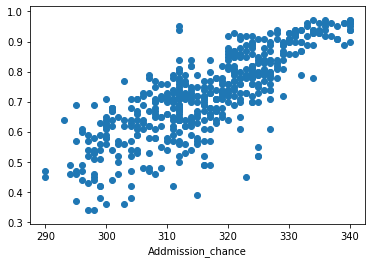

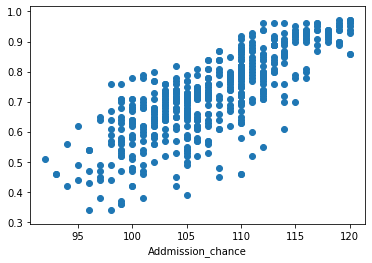

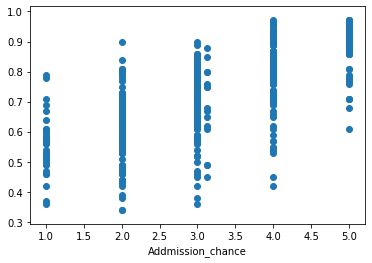

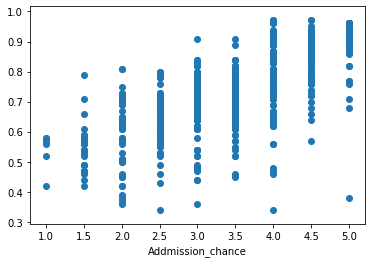

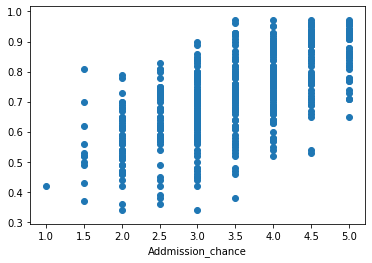

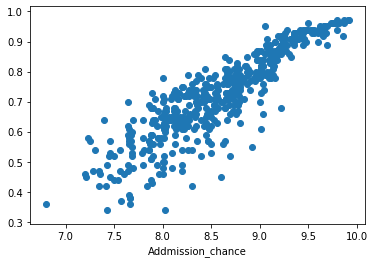

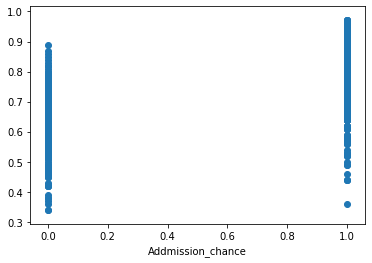

In [20]:
for col in x.columns :
    if (col != ['Chance of Admit']) :
        plt.scatter(x[col],y)
        plt.xlabel("Addmission_chance")
        plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler
Scaler_feature =StandardScaler()
Scaler_label =StandardScaler()
Scaled_data =Scaler_feature.fit_transform(x)

In [23]:
Scaled_data

array([[ 1.85052822,  1.77547686,  0.77890565, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.68147064, -0.04027672,  0.77890565, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.39765943, -0.53548224, -0.1078766 , ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.22103568,  2.10561387,  1.66568791, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39765943, -0.70055074,  0.77890565, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.95125316,  0.95013432,  0.77890565, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [24]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.33,random_state =100)

In [25]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
from sklearn.metrics import r2_score
score = r2_score(reg.predict(test_x),test_y)
score

0.8076993525686706